# MgO Analysis Manual Scans

We start with manual scans from MgO 1800 nm short pulses

In [4]:
from context import Harmonics_Analysis
from Harmonics_Analysis.scan_anal import Scan
from Harmonics_Analysis.iris_functions import Iris
import os
from scipy.optimize import curve_fit
import numpy as np 
import matplotlib.pyplot as plt
from functions import Andor_calib
import warnings
warnings.filterwarnings('ignore')

In [13]:
#Iris calibration from 28th Jan at 1800 nm short pulse
""" 1800 nm scans"""
power_3101_1800short = np.array([235, 235, 235, 235, 235, 235, 230, 225, 225, 220, 205, 195, 170, 130, 100, 65, 30, 9, 3])*1e-3
iris_pos_3101_1800short = np.linspace(45,-45,19)

iris_3101 = Iris()
iris_3101.specify_calib(iris_positions=iris_pos_3101_1800short, powers=power_3101_1800short)
iris_3101.specify_params(w0_init=100e-6, f=0.75, wl=1800e-9, M2=1, reprate=1000,pulse_duration=15e-15)


In [6]:
data_folder = '../../../Data/' 
data_folder = os.path.join(data_folder,'2022-01-31')
os.listdir(data_folder)

['Chirp_scan_manual',
 'Rotation_scan_manual',
 '.DS_Store',
 'HCF spectra',
 'DynoimagesMgO',
 'Rotation scan_manual',
 'Chirp scan_manual']

In [2]:
Chirp_folder = os.path.join(data_folder,'Chirp_scan_manual')
Rotation_folder = os.path.join(data_folder, 'Rotation_scan_manual')

# Chirp Scan Analysis

Manual Scans but this is the data we have from the MgO

In [37]:
Chirp = Scan()
Chirp.set_folder(Chirp_folder)
Chirp.set_verlim(900, 1200)
files = [i for i in os.listdir(Chirp_folder) if 'sig' in i]
bg = []
exclude = bg+[]
files = [i for i in files if i not in exclude]

In [38]:
variables = [float(i.split('_')[1][4:]) for i in files]
Chirp.set_params(rotation=0, MCPPos=120000,iris=-26.5)
Chirp.set_eVlim((12,35))
stage = 'wedge'


In [39]:
Chirp.populate_scan_manual(files, variables, stage=stage, function = Andor_calib)
Chirp.add_calibration_stage('intensity', iris_3101.get_intensity_TWcm2, 'iris')
#Chirp.sort_by_stage(stage)

100%|██████████| 13/13 [00:02<00:00,  6.28it/s]


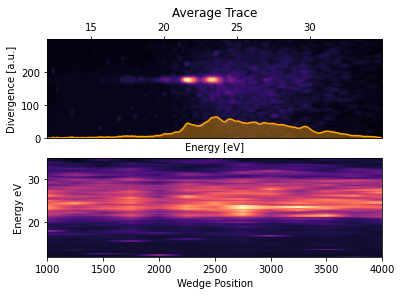

In [40]:
fig, ax = plt.subplots(2)
im, ax[0], ax2 = Chirp.plot_average(ax[0])
ax[0].set_title('Average Trace')
ax[0].xaxis.tick_top()
ax[0].set_xlabel('Energy [eV]', va = 'top')
ax[0].set_ylabel('Divergence [a.u.]')
im, ax[1] = Chirp.plot_scan_mean(ax[1], stage)
ax[1].set_xlabel('Wedge Position')
ax[1].set_ylabel('Energy eV')
plt.show()

So from the average intensity scan we can only see the plasmon. We can see that the plasmon starts at around 12 TW/cm2. So we need to mask it at around 28 iris position. The plasmon analysis should be done at some point too. 

The scatter seams constant throughout the Intensity scan so we can try to filter it out for out lineoutss - We need to check this is the same for all iris plots and all  samples and days!

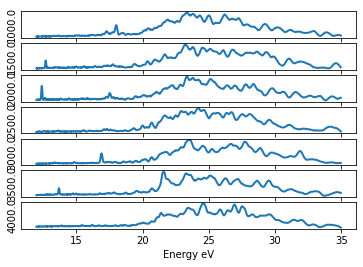

In [52]:

no_plots = 7
fig, ax = plt.subplots(no_plots)
ax = Chirp.plot_lineouts_mean(ax, stage, no_plots-1)
ax[-1].set_xlabel('Energy eV')
plt.show()



# Rotation Scan Analysis

Manual Scans but this is the data we have from the MgO

In [76]:
Rot = Scan()
Rot.set_folder(Rotation_folder)
Rot.set_verlim(900, 1200)
files = [i for i in os.listdir(Rotation_folder) if 'sig' in i]
bg = []
exclude = bg+[]
files = [i for i in files if i not in exclude]
print(files)

['min26.5_30deg_sig_X1.tif', 'min26.5_40deg_sig_X1.tif', 'min26.5_50deg_sig_X1.tif', 'min26.5_20deg_sig_X1.tif', 'min26.5_80deg_sig_X1.tif', 'min26.5_00deg_sig_X1.tif', 'min26.5_70deg_sig_X1.tif', 'min26.5_60deg_sig_X1.tif', 'min26.5_10deg_sig_X1.tif', 'min26.5_90deg_sig_X1.tif', 'min26.5_170deg_sig_X1.tif', 'min26.5_180deg_sig_X1.tif', 'min26.5_100deg_sig_X1.tif', 'min26.5_110deg_sig_X1.tif', 'min26.5_160deg_sig_X1.tif', 'min26.5_140deg_sig_X1.tif', 'min26.5_130deg_sig_X1.tif', 'min26.5_120deg_sig_X1.tif', 'min26.5_150deg_sig_X1.tif']


In [77]:
variables = [float(i.split('_')[1][:-3]) for i in files]
Rot.set_params(wedge=1060, MCPPos=120000,iris=-26.5)
Rot.set_eVlim((16,35))
stage = 'rotation'
print(variables)

[30.0, 40.0, 50.0, 20.0, 80.0, 0.0, 70.0, 60.0, 10.0, 90.0, 170.0, 180.0, 100.0, 110.0, 160.0, 140.0, 130.0, 120.0, 150.0]


In [78]:
Rot.populate_scan_manual(files, variables, stage=stage, function = Andor_calib)
Rot.add_calibration_stage('intensity', iris_3101.get_intensity_TWcm2, 'iris')
Rot.sort_by_stage(stage)

100%|██████████| 19/19 [00:03<00:00,  5.31it/s]


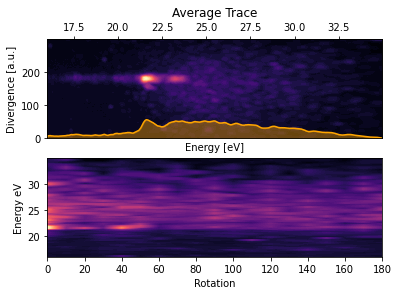

In [79]:
fig, ax = plt.subplots(2)
im, ax[0], ax2 = Rot.plot_average(ax[0])
ax[0].set_title('Average Trace')
ax[0].xaxis.tick_top()
ax[0].set_xlabel('Energy [eV]', va = 'top')
ax[0].set_ylabel('Divergence [a.u.]')
im, ax[1] = Rot.plot_scan_mean(ax[1], stage)
ax[1].set_xlabel('Rotation')
ax[1].set_ylabel('Energy eV')
plt.show()

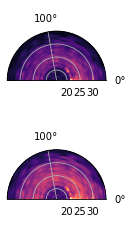

In [81]:
fig, ax = plt.subplots(2, subplot_kw={'projection': 'polar'})
im, ax[0] = Rot.plot_polar_scan(ax[0])
im, ax[1] = Rot.plot_polar_scan_log(ax[1])
plt.show()

So from the average intensity scan we can only see the plasmon. We can see that the plasmon starts at around 12 TW/cm2. So we need to mask it at around 28 iris position. The plasmon analysis should be done at some point too. 

The scatter seams constant throughout the Intensity scan so we can try to filter it out for out lineoutss - We need to check this is the same for all iris plots and all  samples and days!

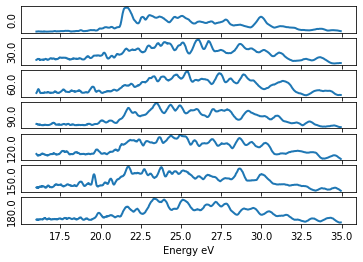

In [82]:

no_plots = 7
fig, ax = plt.subplots(no_plots)
ax = Rot.plot_lineouts_mean(ax, stage, no_plots-1)
ax[-1].set_xlabel('Energy eV')
plt.show()

